In [1]:
import sys  
sys.path.insert(0, '/Stats-Toolbox')

from statsbox import Decision_Tree
from statsbox import K_Means


In [10]:
from sklearn.cluster import KMeans
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("Credit Card Customer Data.csv")

X = df.iloc[:, 1:].values

cluster, centroids = K_Means.cluster(3, X)

print(centroids)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

print('      ')
print('       -           -              -   ')
print('     ')

print(kmeans.cluster_centers_)

[[5.69500400e+04 1.41360000e+05 8.60000000e+00 6.00000000e-01
  1.06200000e+01 1.08000000e+00]
 [7.76736416e+04 2.87679181e+04 4.35836177e+00 2.57337884e+00
  1.89761092e+00 3.78156997e+00]
 [3.40298864e+04 2.30977918e+04 4.41324921e+00 2.52996845e+00
  1.99684543e+00 3.79495268e+00]]
      
       -           -              -   
     
[[7.76160170e+04 2.89557823e+04 4.37755102e+00 2.56802721e+00
  1.93537415e+00 3.77551020e+00]
 [3.40298864e+04 2.30977918e+04 4.41324921e+00 2.52996845e+00
  1.99684543e+00 3.79495268e+00]
 [5.68728571e+04 1.42530612e+05 8.57142857e+00 5.91836735e-01
  1.05714286e+01 1.06122449e+00]]


In [11]:
pred_clusters = kmeans.predict(X)

In [12]:
X

array([[ 87073, 100000,      2,      1,      1,      0],
       [ 38414,  50000,      3,      0,     10,      9],
       [ 17341,  50000,      7,      1,      3,      4],
       ...,
       [ 53834, 145000,      8,      1,      9,      1],
       [ 80655, 172000,     10,      1,     15,      0],
       [ 80150, 167000,      9,      0,     12,      2]])

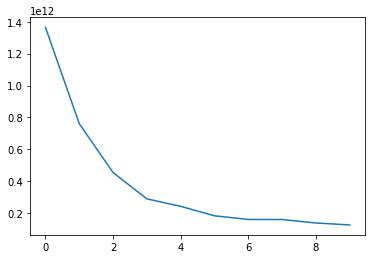

In [13]:
K_Means.plot_elbow(X, 10)

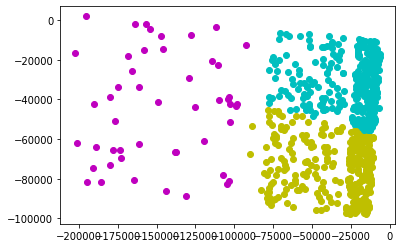

In [14]:
K_Means.plot_clusters(pred_clusters, X)

In [6]:
import matplotlib.pyplot as plt


def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)
    return sse

In [11]:
kmeans = KMeans(n_clusters = 4).fit(X)
pred_clusters = kmeans.predict(X)
pred_clusters

array([2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_elbow(X, k):
    plt.plot(calculate_WSS(X, k))

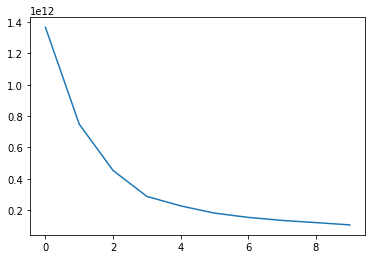

In [9]:
plot_elbow(X, 10)

In [40]:
def PCA(X, n_components):
    cov_mat = np.cov(X , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     #you can select any number of components.
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
    return X_reduced

In [30]:
X_reduced = PCA(X, 2)
len(X_reduced)

660

In [31]:
len(centroids)

4

In [9]:
dim1=[]
dim2=[]
for x in X_reduced:
    dim1.append(x[0])
    dim2.append(x[1])

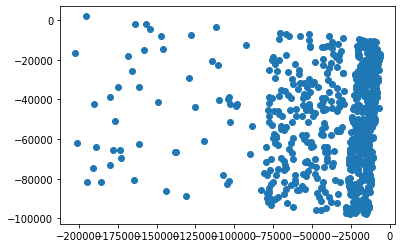

In [10]:
plt.scatter(dim1, dim2)

In [49]:
def plot_clusters(clusters, X, dims=2):
    
    dim1=[]
    dim2=[]
    
    X_reduced = PCA(X, 2)
    
    for x in X_reduced:
        dim1.append(x[0])
        dim2.append(x[1])
            
    
    for i in range(len(X_reduced)):
        colors = [ 'y', 'c', 'm','r', 'b', 'g',]
        idx=cluster[i]
        color=colors[idx]
        plt.plot(dim1[i], dim2[i], marker="o", markeredgecolor=color, markerfacecolor=color)

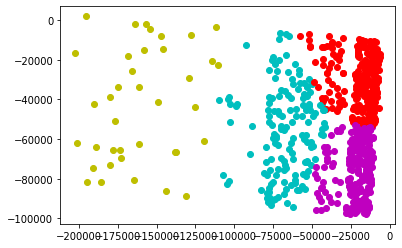

In [50]:
plot_clusters(cluster, X)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from statsbox import Decision_Tree
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("../drug200.csv")
col_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
data = df
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=41)

classifier = Decision_Tree.DecisionTreeClassifier(
    min_samples_split=3, max_depth=3)
# classifier.fit(X_train,Y_train)

classifier.fit(X_train, Y_train, 'entropy')

Y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, Y_pred))


0.925


In [13]:
from statsbox import TF_tools as tfidf
import pandas as pd
df = pd.read_csv("../Amazon-data.csv")
sentences = df['reviews.text']
x_sent = []
for s in sentences:
    x_sent.append(s)
x_sent = x_sent[500:1000]
x = x_sent[20:50]

x = (tfidf.remove_stopwords(tfidf.lowercase(tfidf.remove_punctuation(x))))
words_set = tfidf.get_word_set(x, 'set')

df_tf = tfidf.TF_matrix(x, words_set, 'list')
df_tf_idf = tfidf.TF_IDF(x, words_set, df_tf, 'list')

df_tf_idf = pd.DataFrame(df_tf_idf)
print(df_tf_idf)


         0         1         2         3         4         5         6    \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.028916  0.000000  0.000000  0.000000  0.000000  0.028916   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.016255  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.050223  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

/var/folders/vl/5bp0nbzd28vgxygxw50kjt4r0000gn/T/ipykernel_80576/3628652456.py:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Amazon-data.csv")


In [ ]:
import numpy as np
import pandas as pd
from statsbox.logistic_regression import LogisticRegression

# Logistic Regression Code Reference: https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2
# Data source: https://www.kaggle.com/code/dyasin/week24ml-weather-dataset-rattle-package-weatheraus/data 

def handle_nulls(df):
    for col in df:
        col_median=df[col].median()
        df[col].fillna(col_median, inplace=True)

df = pd.read_csv("weatherAUS.csv")
y = pd.get_dummies(df.RainTomorrow, drop_first=True)
y = y.values.reshape(-1,1)

# Drop categorical columns
df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'Evaporation', 'Sunshine', 'WindDir3pm', 'RainToday',  "RainTomorrow"],  axis=1, inplace=True)
handle_nulls(df)

# Normalize Data
df = (df-df.mean())/df.std()
X = df.values

# # Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=44)

logregmodel = LogisticRegression()

logregmodel.fit(X_train,y_train,lr=0.01, epochs=1000, batchsize=10000)
y_pred = logregmodel.predict(X_test)

print("Accuracy: ",logregmodel.accuracy(y_test,y_pred))

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/abhik-mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
clf.score(X_test, y_test)

0.8425684036848619